<center>
<h1> Lab 1 - 7331 Data Mining </h1>
<h2> Dan Freeman, Ireti Fasere, Timothy McWilliams, & Peter Kouvaris </h2>
</center>

### 1 - Business Understanding (10%)

### Preparing Python for Data Exploration

In [1]:
#imports for data-preprocessing
import pandas as pd
import numpy as np

#viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#import data 
data_file = '../data/adult.csv'
df = pd.read_csv(data_file)

### 2 - Meaning & Data Types (10%)

In [3]:
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


| Column Name   | Data Type     | Example Array  |
    | ------------- |:-------------:| -----:|
    | col 3 is      | right-aligned | $1600 |
    | col 2 is      | centered      |   $12 |

### 3 - Data Quality Review (15%)

### 4 - Sample Statistics (10%)

### Basic summary statistics on the continuous variables 

#### There are 32,561 individuals that were observed. The ages of said individuals range from 17 to 90 years of age. The overall capital gain mean is 1,077.64 and the overall capital loss mean is 87.30. The mean education level for this data set is 10 which is equal to having some college. 

#### In order to get a well understanding of how the categorical data (race, sex, and education) is distributed the data will be grouped into each categorical variable and the summary statistics will be displayed. We will create a new variable 'age_range' which will consist of Adult and Senior individuals. We will use this new variable to group with race and sex in order to get a more in depth understanding of those variables. 

In [4]:
#summary statistics of continuous/nominal data
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### The folowing table displays summary statistics broken down into each level of educaiton. Those who made more years of educaiton tend to have a higher mean captial gain and also a higher mean captial loss. Note that the mean hours per week for all education levels are the roughly the same. Therefore, someone with more years of education works about the same hours per week as an individual with less years of education but still has a higher mean captial gain and mean capital loss. This can be due to the different types of salary each individual from each education level makes. 

In [5]:
#summary statistics for all continuous variables grouped by education

#group the data according to education
by_education = df.groupby(['education'])

#summary statistics on the levels of education 
by_education.describe()

age  capital_gain  capital_loss  education_num  \
education                                                                     
 10th         count   933.000000    933.000000    933.000000          933.0   
              mean     37.429796    404.574491     56.845659            6.0   
              std      16.720713   4866.650036    338.041912            0.0   
              min      17.000000      0.000000      0.000000            6.0   
              25%      22.000000      0.000000      0.000000            6.0   
              50%      34.000000      0.000000      0.000000            6.0   
              75%      52.000000      0.000000      0.000000            6.0   
              max      90.000000  99999.000000   3770.000000            6.0   
 11th         count  1175.000000   1175.000000   1175.000000         1175.0   
              mean     32.355745    215.097872     50.079149            7.0   
              std      15.545485   1236.802986    303.868748            0.0   
              min      17.000000      0.000000      0.000000            7.0   
              25%      18.000000      0.000000      0.000000            7.0   
              50%      28.000000      0.000000      0.000000            7.0   
              75%      43.000000      0.000000      0.000000            7.0   
              max      90.000000  14344.000000   2824.000000            7.0   
 12th         count   433.000000    433.000000    433.000000          433.0   
              mean     32.000000    284.087760     32.337182            8.0   
              std      14.334625   1664.963071    237.685867            0.0   
              min      17.000000      0.000000      0.000000            8.0   
              25%      19.000000      0.000000      0.000000            8.0   
              50%      28.000000      0.000000      0.000000            8.0   
              75%      41.000000      0.000000      0.000000            8.0   
              max      79.000000  18481.000000   2258.000000            8.0   
 1st-4th      count   168.000000    168.000000    168.000000          168.0   
              mean     46.142857    125.875000     48.327381            2.0   
              std      15.615625    789.257630    316.302639            0.0   
              min      19.000000      0.000000      0.000000            2.0   
              25%      33.000000      0.000000      0.000000            2.0   
              50%      46.000000      0.000000      0.000000            2.0   
...                          ...           ...           ...            ...   
 Masters      std      11.068935  10912.346769    550.698397            0.0   
              min      18.000000      0.000000      0.000000           14.0   
              25%      36.000000      0.000000      0.000000           14.0   
              50%      43.000000      0.000000      0.000000           14.0   
              75%      51.000000      0.000000      0.000000           14.0   
              max      90.000000  99999.000000   2824.000000           14.0   
 Preschool    count    51.000000     51.000000     51.000000           51.0   
              mean     42.764706    898.392157     66.490196            1.0   
              std      15.126914   5806.333838    332.417711            0.0   
              min      19.000000      0.000000      0.000000            1.0   
              25%      31.000000      0.000000      0.000000            1.0   
              50%      41.000000      0.000000      0.000000            1.0   
              75%      53.500000      0.000000      0.000000            1.0   
              max      75.000000  41310.000000   1719.000000            1.0   
 Prof-school  count   576.000000    576.000000    576.000000          576.0   
              mean     44.746528  10414.416667    231.203125           15.0   
              std      11.962477  27047.486637    663.150752            0.0   
              min      25.000000      0.000000      0.000000           15.0   


#### ****Complete after the '?' are taken out****

In [6]:
#summary statistics for all continuous variables grouped by workclass

#group the data according to workclass
by_workclass = df.groupby(['workclass'])

#summary statistics on the levels of workclass
by_workclass.describe()

age  capital_gain  capital_loss  \
workclass                                                          
 ?                count  1836.000000   1836.000000   1836.000000   
                  mean     40.960240    606.795752     60.760349   
                  std      20.334587   5147.323872    354.685264   
                  min      17.000000      0.000000      0.000000   
                  25%      21.000000      0.000000      0.000000   
                  50%      35.000000      0.000000      0.000000   
                  75%      61.000000      0.000000      0.000000   
                  max      90.000000  99999.000000   4356.000000   
 Federal-gov      count   960.000000    960.000000    960.000000   
                  mean     42.590625    833.232292    112.268750   
                  std      11.509171   4101.966767    453.504623   
                  min      17.000000      0.000000      0.000000   
                  25%      34.000000      0.000000      0.000000   
                  50%      43.000000      0.000000      0.000000   
                  75%      51.000000      0.000000      0.000000   
                  max      90.000000  99999.000000   3683.000000   
 Local-gov        count  2093.000000   2093.000000   2093.000000   
                  mean     41.751075    880.202580    109.854276   
                  std      12.272856   5775.043442    439.513203   
                  min      17.000000      0.000000      0.000000   
                  25%      32.000000      0.000000      0.000000   
                  50%      41.000000      0.000000      0.000000   
                  75%      50.000000      0.000000      0.000000   
                  max      90.000000  99999.000000   2444.000000   
 Never-worked     count     7.000000      7.000000      7.000000   
                  mean     20.571429      0.000000      0.000000   
                  std       4.613644      0.000000      0.000000   
                  min      17.000000      0.000000      0.000000   
                  25%      18.000000      0.000000      0.000000   
                  50%      18.000000      0.000000      0.000000   
...                              ...           ...           ...   
 Self-emp-inc     std      12.553194  17976.548086    549.488497   
                  min      17.000000      0.000000      0.000000   
                  25%      37.000000      0.000000      0.000000   
                  50%      45.000000      0.000000      0.000000   
                  75%      54.000000      0.000000      0.000000   
                  max      84.000000  99999.000000   2559.000000   
 Self-emp-not-inc count  2541.000000   2541.000000   2541.000000   
                  mean     44.969697   1886.061787    116.631641   
                  std      13.338162  10986.233506    467.611687   
                  min      17.000000      0.000000      0.000000   
                  25%      35.000000      0.000000      0.000000   
                  50%      44.000000      0.000000      0.000000   
                  75%      54.000000      0.000000      0.000000   
                  max      90.000000  99999.000000   2824.000000   
 State-gov        count  1298.000000   1298.000000   1298.000000   
                  mean     39.436055    701.699538     83.256549   
                  std      12.431065   3777.749185    394.469789   
                  min      17.000000      0.000000      0.000000   
                  25%      30.000000      0.000000      0.000000   
                  50%      39.000000      0.000000      0.000000   
                  75%      48.000000      0.000000      0.000000   
                  max      81.000000  99999.000000   3683.000000   
 Without-pay      count    14.000000     14.000000     14.000000   
                  mean     47.785714    487.857143      0.000000   
                  std      21.075610   1300.780467      0.000000   
                  min      19.000000      0.000000      0.000000   
                  25%

#### The folowing table displays summary statistics broken down into each level of race. Individuals of the race Asian-Pacific-Islander have the highest mean capital gain and mean capital loss. This race also has the highest mean education number. 

In [7]:
#summary statistics for all continuous variables grouped by race

#group the data according to race
by_race = df.groupby(['race'])

#summary statistics on the levels of race
by_race.describe()

age  capital_gain  capital_loss  \
race                                                                  
 Amer-Indian-Eskimo count    311.000000    311.000000    311.000000   
                    mean      37.173633    625.266881     34.176849   
                    std       12.447130   2753.238961    245.583106   
                    min       17.000000      0.000000      0.000000   
                    25%       28.000000      0.000000      0.000000   
                    50%       35.000000      0.000000      0.000000   
                    75%       45.500000      0.000000      0.000000   
                    max       82.000000  27828.000000   1980.000000   
 Asian-Pac-Islander count   1039.000000   1039.000000   1039.000000   
                    mean      37.746872   1478.358037     97.222329   
                    std       12.825133   9986.156906    423.556931   
                    min       17.000000      0.000000      0.000000   
                    25%       28.000000      0.000000      0.000000   
                    50%       36.000000      0.000000      0.000000   
                    75%       45.000000      0.000000      0.000000   
                    max       90.000000  99999.000000   2457.000000   
 Black              count   3124.000000   3124.000000   3124.000000   
                    mean      37.767926    609.940461     60.385083   
                    std       12.759290   5139.653447    337.394121   
                    min       17.000000      0.000000      0.000000   
                    25%       28.000000      0.000000      0.000000   
                    50%       36.000000      0.000000      0.000000   
                    75%       46.000000      0.000000      0.000000   
                    max       90.000000  99999.000000   4356.000000   
 Other              count    271.000000    271.000000    271.000000   
                    mean      33.457565    934.660517     61.070111   
                    std       11.538865   8625.128995    322.452705   
                    min       17.000000      0.000000      0.000000   
                    25%       25.000000      0.000000      0.000000   
                    50%       31.000000      0.000000      0.000000   
                    75%       41.000000      0.000000      0.000000   
                    max       77.000000  99999.000000   2179.000000   
 White              count  27816.000000  27816.000000  27816.000000   
                    mean      38.769881   1121.660375     90.806155   
                    std       13.782306   7504.533302    410.833347   
                    min       17.000000      0.000000      0.000000   
                    25%       28.000000      0.000000      0.000000   
                    50%       37.000000      0.000000      0.000000   
                    75%       48.000000      0.000000      0.000000   
                    max       90.000000  99999.000000   4356.000000   

                           education_num        fnlwgt  hours_per_week  
race                                                                    
 Amer-Indian-Eskimo count     311.000000  3.110000e+02      311.000000  
                    mean        9.311897  1.208311e+05       40.048232  
                    std         2.310387  8.833864e+04       11.695364  
                    min         2.000000  1.228500e+04        3.000000  
                    25%         9.000000  3.503650e+04       40.000000  
                    50%         9.000000  1.025410e+05       40.000000  
                    75%        10.000000  1.761420e+05       40.000000  
                    max        16.000000  4.451680e+05       84.000000  
 Asian-Pac-Islander count    1039.000000  1.039000e+03     1039.000000  
                    mean       10.960539  1.599406e+05       40.127045  
                    std         2.811582  8.512231e+04       12.556816  
                    min         1.000000  1.487800e+04        1.000000  
                    25%        

#### Should we include this??? Need the '?' taken out!

In [8]:
#summary statistics for all continuous variables grouped by native country

#group the data according to native country
by_native_country = df.groupby(['native_country'])

#summary statistics on the levels of sex
by_native_country.describe()

age  capital_gain  capital_loss  \
native_country                                                     
 ?               count    583.000000    583.000000    583.000000   
                 mean      38.725557   1806.518010    118.265866   
                 std       12.404833  11137.277432    471.230665   
                 min       17.000000      0.000000      0.000000   
                 25%       30.000000      0.000000      0.000000   
                 50%       37.000000      0.000000      0.000000   
                 75%       46.000000      0.000000      0.000000   
                 max       90.000000  99999.000000   3004.000000   
 Cambodia        count     19.000000     19.000000     19.000000   
                 mean      37.789474   1027.842105    183.052632   
                 std       11.073386   3214.685716    550.208190   
                 min       18.000000      0.000000      0.000000   
                 25%       30.000000      0.000000      0.000000   
                 50%       37.000000      0.000000      0.000000   
                 75%       44.000000      0.000000      0.000000   
                 max       65.000000  13550.000000   1876.000000   
 Canada          count    121.000000    121.000000    121.000000   
                 mean      42.545455   1504.132231    129.933884   
                 std       15.081998   9417.686864    493.593553   
                 min       17.000000      0.000000      0.000000   
                 25%       30.000000      0.000000      0.000000   
                 50%       41.000000      0.000000      0.000000   
                 75%       53.000000      0.000000      0.000000   
                 max       80.000000  99999.000000   2339.000000   
 China           count     75.000000     75.000000     75.000000   
                 mean      42.533333    366.480000    179.520000   
                 std       12.526009   1887.790775    569.638395   
                 min       22.000000      0.000000      0.000000   
                 25%       33.000000      0.000000      0.000000   
                 50%       41.000000      0.000000      0.000000   
...                              ...           ...           ...   
 Trinadad&Tobago std       10.842574      0.000000    670.478214   
                 min       17.000000      0.000000      0.000000   
                 25%       34.000000      0.000000      0.000000   
                 50%       42.000000      0.000000      0.000000   
                 75%       47.000000      0.000000      0.000000   
                 max       61.000000      0.000000   2339.000000   
 United-States   count  29170.000000  29170.000000  29170.000000   
                 mean      38.655674   1089.229928     88.510593   
                 std       13.722408   7381.898528    405.681709   
                 min       17.000000      0.000000      0.000000   
                 25%       28.000000      0.000000      0.000000   
                 50%       37.000000      0.000000      0.000000   
                 75%       48.000000      0.000000      0.000000   
                 max       90.000000  99999.000000   4356.000000   
 Vietnam         count     67.000000     67.000000     67.000000   
                 mean      34.059701    660.597015     87.298507   
                 std       13.491727   2618.198247    413.468734   
                 min       19.000000      0.000000      0.000000   
                 25%       23.000000      0.000000      0.000000   
                 50%       30.000000      0.000000      0.000000   
                 75%       43.500000      0.000000      0.000000   
                 max       73.000000  15024.000000   2457.000000   
 Yugoslavia      count     16.000000     16.000000     16.000000   
                 mean      38.812500    347.250000      0.000000   
                 std       12.697605   1389.000000      0.000000   
                 min       20.000000      0.000000      0.000000   
                 25% 

#### This next section will create the new variable 'age_range'. Doing this will allow us to distingush how may seniors, age>65years, are in the work force and how their capital gain and capital loss compares to the adults, 17years > adult < 65years.

In [9]:
#breaking up the age variable to create a new varible 'age_range'
df['age_range'] = pd.cut(df.age,[16,65,1e6],3,labels=['adult','senior'])

#checking the new variable 
df.age_range.describe()

count     32561
unique        2
top       adult
freq      31403
Name: age_range, dtype: object

#### The table displayed below shows the summary statistics for an adult and senior female, as well as an adult and senior male. An adult female has mean capital gain is 588.95 and mean capital loss is 60.02. A senior female has a mean capital gain of 824.09 and a mean capital loss of 92.70. An adult male has mean capital gain is 1288.70 and mean capital loss is 98.80. A senior male has a mean capital gain of 2433.58 and a mean capital loss of 138.38. It is clear that a senioir male has the highest mean capital gain and capital loss. 

In [10]:
#group the with the new variable 'age_range' with sex
df_grouped = df.groupby(by=['sex','age_range'])

#summary statistics 
df_grouped.describe()

age  capital_gain  capital_loss  \
sex     age_range                                                   
 Female adult     count  10387.000000  10387.000000  10387.000000   
                  mean      35.570039    558.957928     60.022432   
                  std       12.485963   4977.576200    331.288181   
                  min       17.000000      0.000000      0.000000   
                  25%       25.000000      0.000000      0.000000   
                  50%       34.000000      0.000000      0.000000   
                  75%       45.000000      0.000000      0.000000   
                  max       65.000000  99999.000000   3900.000000   
        senior    count    384.000000    384.000000    384.000000   
                  mean      71.703125    824.098958     92.705729   
                  std        5.691402   3150.936583    539.288758   
                  min       66.000000      0.000000      0.000000   
                  25%       67.000000      0.000000      0.000000   
                  50%       70.000000      0.000000      0.000000   
                  75%       74.000000      0.000000      0.000000   
                  max       90.000000  25124.000000   4356.000000   
 Male   adult     count  21016.000000  21016.000000  21016.000000   
                  mean      38.239912   1288.702893     98.807385   
                  std       12.000155   8240.487488    425.571268   
                  min       17.000000      0.000000      0.000000   
                  25%       29.000000      0.000000      0.000000   
                  50%       37.000000      0.000000      0.000000   
                  75%       47.000000      0.000000      0.000000   
                  max       65.000000  99999.000000   3770.000000   
        senior    count    774.000000    774.000000    774.000000   
                  mean      71.843669   2433.583979    138.387597   
                  std        5.810514  10334.691827    529.996678   
                  min       66.000000      0.000000      0.000000   
                  25%       67.000000      0.000000      0.000000   
                  50%       70.000000      0.000000      0.000000   
                  75%       75.000000      0.000000      0.000000   
                  max       90.000000  99999.000000   2489.000000   

                         education_num        fnlwgt  hours_per_week  
sex     age_range                                                     
 Female adult     count   10387.000000  1.038700e+04    10387.000000  
                  mean       10.071628  1.861609e+05       36.801098  
                  std         2.348443  1.031674e+05       11.484964  
                  min         1.000000  1.228500e+04        1.000000  
                  25%         9.000000  1.175270e+05       32.000000  
                  50%        10.000000  1.764860e+05       40.000000  
                  75%        12.000000  2.293075e+05       40.000000  
                  max        16.000000  1.484705e+06       99.000000  
        senior    count     384.000000  3.840000e+02      384.000000  
                  mean        9.065104  1.745329e+05       25.841146  
                  std         2.956328  9.741507e+04       15.162076  
                  min         1.000000  2.010100e+04        1.000000  
                  25%         9.000000  1.084898e+05       15.000000  
                  50%         9.000000  1.625895e+05       24.000000  
                  75%        10.000000  2.132505e+05       40.000000  
                  max        16.000000  6.604610e+05       99.000000  
 Male   adult     count   21016.000000  2.101600e+04    21016.000000  
                  mean       10.121193  1.924004e+05       42.863247  
                  std         2.625089  1.072284e+05       11.680933  
                  min         1.000000  1.376900e+04        1.000000  
                  25%         9.000000  1.186155e+05       40.000000  
                  50%        10.000000  1.805990e+05  

# Should we include this one or the one table described preiously about race?

In [11]:
#group the with the new variable 'age_range' with race
df_grouped2 = df.groupby(by=['race','age_range'])

#summary statistics 
df_grouped2.describe()

age  capital_gain  capital_loss  \
race                age_range                                                   
 Amer-Indian-Eskimo adult     count    304.000000    304.000000    304.000000   
                              mean      36.351974    633.753289     34.963816   
                              std       11.299893   2782.643089    248.348104   
                              min       17.000000      0.000000      0.000000   
                              25%       28.000000      0.000000      0.000000   
                              50%       35.000000      0.000000      0.000000   
                              75%       44.250000      0.000000      0.000000   
                              max       65.000000  27828.000000   1980.000000   
                    senior    count      7.000000      7.000000      7.000000   
                              mean      72.857143    256.714286      0.000000   
                              std        6.067085    679.202158      0.000000   
                              min       67.000000      0.000000      0.000000   
                              25%       68.000000      0.000000      0.000000   
                              50%       71.000000      0.000000      0.000000   
                              75%       77.000000      0.000000      0.000000   
                              max       82.000000   1797.000000      0.000000   
 Asian-Pac-Islander adult     count   1012.000000   1012.000000   1012.000000   
                              mean      36.756917   1517.800395     97.388340   
                              std       11.378142  10115.663064    422.422195   
                              min       17.000000      0.000000      0.000000   
                              25%       27.000000      0.000000      0.000000   
                              50%       35.000000      0.000000      0.000000   
                              75%       45.000000      0.000000      0.000000   
                              max       65.000000  99999.000000   2415.000000   
                    senior    count     27.000000     27.000000     27.000000   
                              mean      74.851852      0.000000     91.000000   
                              std        8.046517      0.000000    472.849870   
                              min       66.000000      0.000000      0.000000   
                              25%       70.000000      0.000000      0.000000   
                              50%       73.000000      0.000000      0.000000   
...                                           ...           ...           ...   
 Other              adult     std       10.827186   8672.877227    324.193830   
                              min       17.000000      0.000000      0.000000   
                              25%       25.000000      0.000000      0.000000   
                              50%       31.000000      0.000000      0.000000   
                              75%       41.000000      0.000000      0.000000   
                              max       65.000000  99999.000000   2179.000000   
                    senior    count      3.000000      3.000000      3.000000   
                              mean      72.333333      0.000000      0.000000   
                              std        5.686241      0.000000      0.000000   
                              min       66.000000      0.000000      0.000000   
                              25%       70.000000      0.000000      0.000000   
                              50%       74.000000      0.000000      0.000000   
                              75%       75.500000      0.000000      0.000000   
                              max       77.000000      0.000000      0.000000   
 White              adult     count  26776.000000  26776.000000  26776.000000   
                              mean      37.487601   1086.259075     89.555161   
                              std       12.333171   7434.173294    405.552162

#### The table below displays the counts, unique values, the top subcategory, and the frequency of the categorical varibles. very variable has the same count. The top work class is the Private industry, the top education is HS-graduate, the top age range is adult, and the top native country is the United States. 

In [12]:
#summary statistics of categorical data 
df.describe(exclude=[np.number])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_binary,age_range
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K,adult
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720,31403


#### Interetsing visualization of the summary statistics 

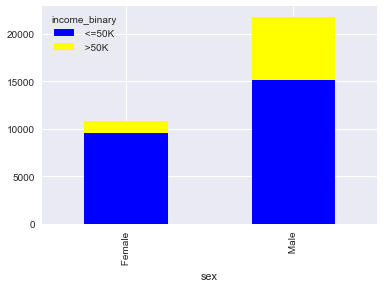

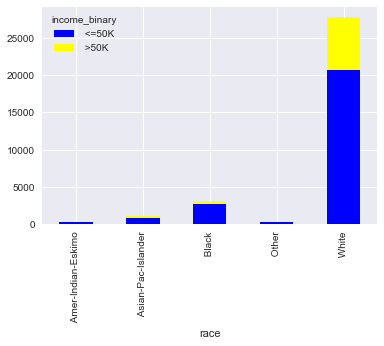

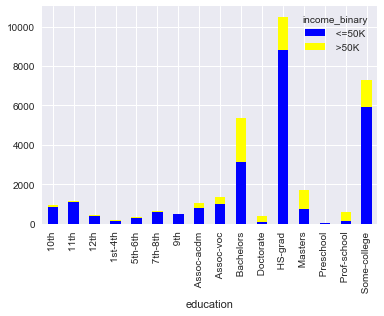

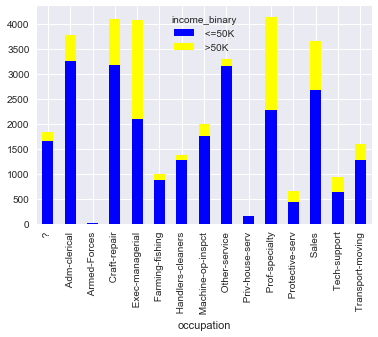

In [13]:
income_sex_counts = pd.crosstab([df['sex']], df.income_binary)
income_sex_counts.plot(kind='bar', stacked=True, color=['blue','yellow'])

income_race_counts = pd.crosstab([df['race']], df.income_binary)
income_race_counts.plot(kind='bar', stacked=True, color=['blue','yellow'])

income_education_counts = pd.crosstab([df['education']], df.income_binary)
income_education_counts.plot(kind='bar', stacked=True, color=['blue','yellow'])

income_education_counts = pd.crosstab([df['occupation']], df.income_binary)
income_education_counts.plot(kind='bar', stacked=True, color=['blue','yellow'])

### 5 - Visualization (15%)

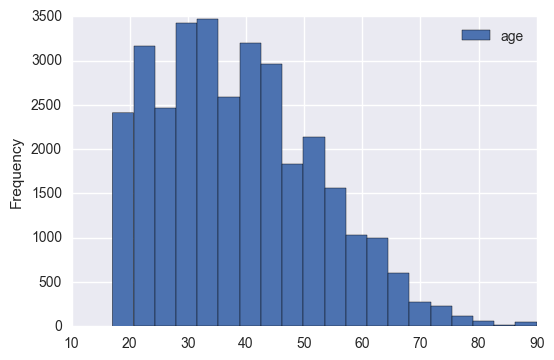

In [4]:
#Histogram
#visualizing the age distribution of the census data
mydata.age.plot.hist(bins=20)
plt.legend()

The age distribution between 20years and 55years were quite frequent. The lowest age was about 20years old and the highest is about 90 years old. Finally, the histogram is skewed to the right or positively skewed.

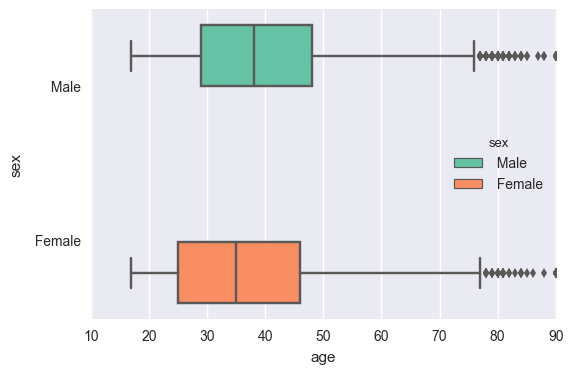

In [5]:
#Boxplot
#Visualizing age vs sex of the census data
sns.boxplot(x ='age',y ='sex',hue ='sex', orient ="h",data= mydata,palette ='Set2',saturation =1, notch =False)

The male age distribution in the first quartile is mostly distributed around 29 years old, second quartile is around 38 years old which is the median, third quartile is mostly 49 years old. The female age distribution in the first quartile is mostly distributed around 25 years old, second quartile is around 35 years old which is the median, third quartile around 47 years old. Most of the outliers is indicated by the diamond symbol and located at the right whiskers between the ages of 78 years old and 90 years old In both the male and female age distribution most of the observation is skewed to the low end of the scale, the distribution is skewed to the right.

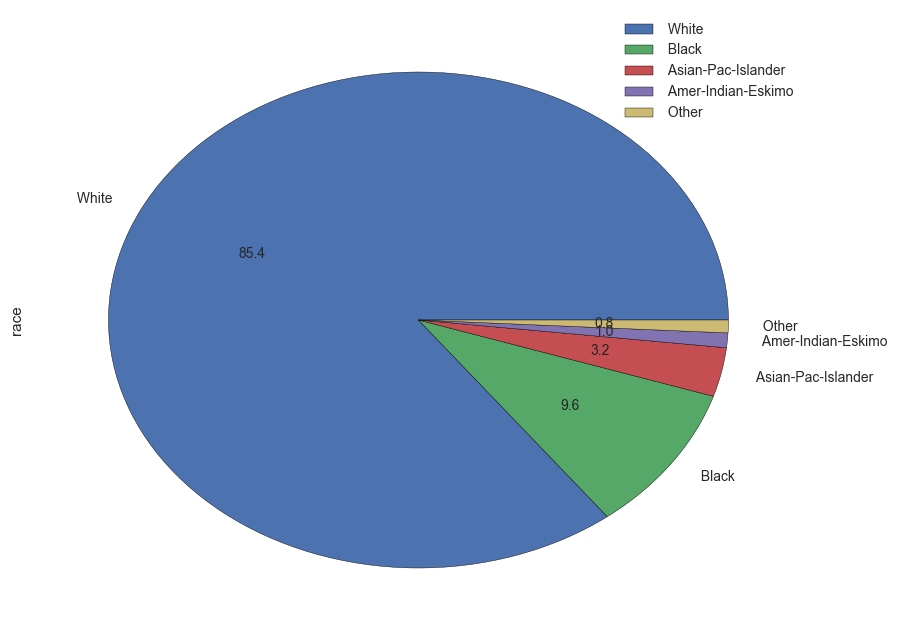

In [6]:
# Pie Chart
#visualizing race of the census data
mydata.race.value_counts().plot(kind='pie', autopct='%.1f',fontsize=10, figsize=(10, 8))
plt.legend()

85.4% of the census data is White, 9.6% is Black, Asian-Pac-Islander accounted for 3.2% of the population, American -Indian-Eskimo accounted for 1.0% of the population, while Other race accounted for just 0.8% of the total population. The White population is dominant here accounting for 85.4% of the total population. Followed by the Black population accounting for only 9.6% of the total population.

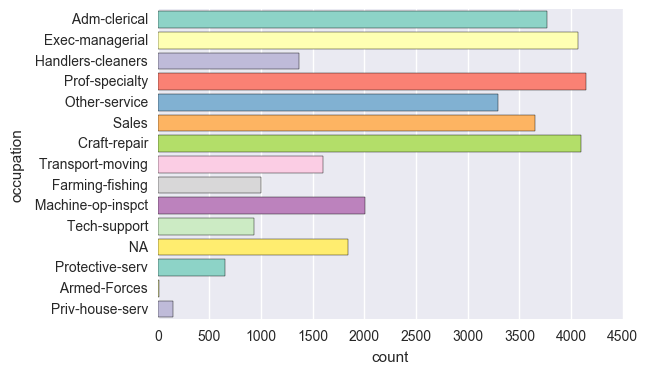

In [7]:
#Barplot
#Visualizing the occupation distribution of the census data
sns.countplot(y='occupation', data=mydata,saturation=1, palette="Set3")

The highest recorded occupation accounted for Over 4000 individual that belong to the Prof-specialty, Exec-managerial,and Craft-repair occupation respectively. The lowest recorded occupation is the Armed-Forces, and Priv-house-serv accounting for less than 100 and 200 respectively. About 1800 individuals did not disclose their occupation. We can assume they are unemployed or self-employed.

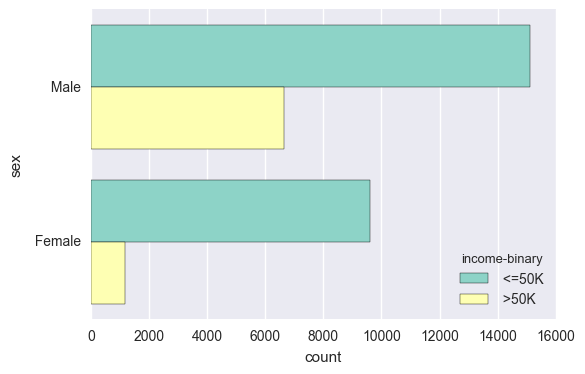

In [8]:
#Barplot
#visualizing sex vs income-binary of the census data
sns.countplot(y="sex", hue="income-binary", data= mydata,saturation=1, palette="Set3")

The male group over 15000 individuals earned below 50k, while about 7000 earned above 50k. The female group over 9000 individuals earned below 50k, while about 1800 earned above 50k. We can conclude that the male earned more than their female counterpart.

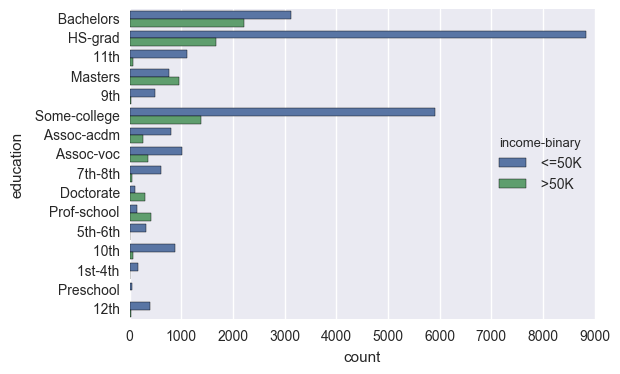

In [9]:
#Barplot
#visualizing education vs income-binary of the census data
sns.countplot(y="education", hue="income-binary", data= mydata)

Most of the population distribution are high school graduate, and Some-college graduate and earned below 50k respectively.Some Individuals with Bachelors, High-school, Some-college, and masters earned above 50k.


### 6 - Feature Relationships (15%)

In [14]:
#ideas
#capital gain count by race, sex, marital_status, occupation, workclass, and education
#non-native vs native field
#income binary and race, weighted



df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_binary,age_range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult


In [31]:
df['cap_activity'] = abs(df.capital_gain) + abs(df.capital_loss)

# plt.plot(df.age,df.capital_gain)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [30]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_binary,age_range,cap_activity
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


In [21]:
df.sort_values("age")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_binary,age_range
12318,17,Private,127366,11th,7,Never-married,Sales,Own-child,White,Female,0,0,8,United-States,<=50K,adult
6312,17,Private,132755,11th,7,Never-married,Sales,Own-child,White,Male,0,0,15,United-States,<=50K,adult
30927,17,Private,108470,11th,7,Never-married,Other-service,Own-child,Black,Male,0,0,17,United-States,<=50K,adult
12787,17,Local-gov,308901,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<=50K,adult
25755,17,?,47407,11th,7,Never-married,?,Own-child,White,Male,0,0,10,United-States,<=50K,adult
14475,17,Private,222618,11th,7,Never-married,Sales,Own-child,Black,Female,0,0,30,United-States,<=50K,adult
23394,17,Private,166242,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K,adult
12802,17,Private,117549,10th,6,Never-married,Sales,Other-relative,Black,Female,0,0,12,United-States,<=50K,adult
11925,17,Private,114798,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,<=50K,adult
28770,17,Private,46402,7th-8th,4,Never-married,Sales,Own-child,White,Male,0,0,8,United-States,<=50K,adult


### 7 - Feature : Class Relationship Explanation (10%)

### 8 - Additional Features Discussion (5%)

### 9 - Exceptional Work (10%)